In [ ]:
import os
import numpy as np
import tensorflow as tf

save_path = "Users/masih/desktop/FER_CNN/Data" # path to data and label NumPy arrays

# Creating a TensorFlow training dataset from NumPy arrays
images = np.load(os.path.join(save_path, 'X_train.npy'))
labels = np.load(os.path.join(save_path, 'y_train.npy'))
train_dataset = tf.data.Dataset.from_tensor_slices((images, labels))

batch_size = 32
shuffle_buffer_size = len(images) 

# Shuffling dataset and creating batches
train_dataset = train_dataset.shuffle(buffer_size=shuffle_buffer_size)
train_dataset = train_dataset.batch(batch_size)

# Creating a TensorFlow validation dataset from NumPy arrays
images = np.load(os.path.join(save_path, 'X_val.npy'))
labels = np.load(os.path.join(save_path, 'y_val.npy'))
val_dataset = tf.data.Dataset.from_tensor_slices((images, labels))

shuffle_buffer_size = len(images) 

# Shuffling dataset and creating batches
val_dataset = val_dataset.shuffle(buffer_size=shuffle_buffer_size)
val_dataset = val_dataset.batch(batch_size)


# Creating a TensorFlow testing dataset from NumPy arrays
images = np.load(os.path.join(save_path, 'X_test.npy'))
labels = np.load(os.path.join(save_path, 'y_test.npy'))
test_dataset = tf.data.Dataset.from_tensor_slices((images, labels))

shuffle_buffer_size = len(images) 

# Shuffling dataset and creating batches
test_dataset = test_dataset.shuffle(buffer_size=shuffle_buffer_size)
test_dataset = test_dataset.batch(batch_size)

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, \
    BatchNormalization, Activation, SpatialDropout2D, GlobalAveragePooling2D
from keras.optimizers import Adam, SGD
from keras.models import Sequential, Model


# Importing pre-trained ResNet50 without classifier head
model_1 = keras.applications.resnet.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

model_1.trainable = False

model_2 = Sequential()

# Placing fully connected layers on top of the network
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(6, activation='softmax'))

model = Model(inputs=model_1.input, outputs=model_2(model_1.output))

# Training the model with updated head, Adam updates 
# for the learning rate, cross entropy loss for loss function
model.compile(optimizer=Adam(), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

chk_path = 'ResNet.h5'

# Saving model with highest validation accuracy 
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             moniter='val_accuracy')

# Early Stopping if validation accuracy fails to improve over 5 epochs, 
# restore weights for best validation accuracy at the end 
earlystop = EarlyStopping(monitor='val_accuracy',  
                          patience=5, 
                          verbose=1, 
                          restore_best_weights=True)

callbacks = [checkpoint, earlystop]

In [ ]:
model_sum = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)

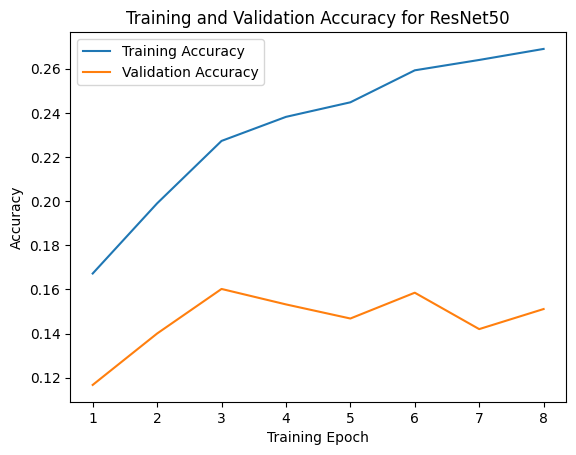

In [7]:
from matplotlib import pyplot as plt

num_epochs = len(model_sum["acc"]) + 1

plt.plot(list(range(1, num_epochs)), model_sum["acc"], label='Training Accuracy')
plt.plot(list(range(1, num_epochs)), model_sum["val_acc"], label='Validation Accuracy')
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for ResNet50")
plt.legend()
plt.show()

In [ ]:
# Importing pre-trained EfficientNetB0 without classifier head
model_1 = keras.applications.EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

model_1.trainable = False

model_2 = Sequential()

# Placing fully connected layers on top of the network
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(6, activation='softmax'))

model = Model(inputs=model_1.input, outputs=model_2(model_1.output))

model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [ ]:
chk_path = 'EfficientNetB0.h5'

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             moniter='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy',  
                          patience=5, 
                          verbose=1, 
                          restore_best_weights=True)

callbacks = [checkpoint, earlystop]

In [ ]:
model_sum = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)

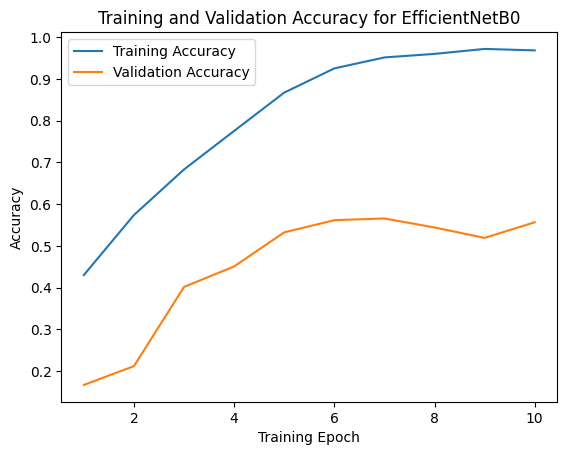

In [8]:
num_epochs = len(model_sum["acc"]) + 1

plt.plot(list(range(1, num_epochs)), model_sum["acc"], label='Training Accuracy')
plt.plot(list(range(1, num_epochs)), model_sum["val_acc"], label='Validation Accuracy')
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for EfficientNetB0")
plt.legend()
plt.show()

In [ ]:
# Importing pre-trained VGG16 without classifier head
model_1 = keras.applications.VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

model_1.trainable = False

model_2 = Sequential()

# Placing fully connected layers on top of the network
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(6, activation='softmax'))

model = Model(inputs=model_1.input, outputs=model_2(model_1.output))


model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [ ]:
chk_path = 'VGG16.h5'

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             moniter='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy',  
                          patience=5, 
                          verbose=1, 
                          restore_best_weights=True)

callbacks = [checkpoint, earlystop]

In [ ]:
model_sum = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)

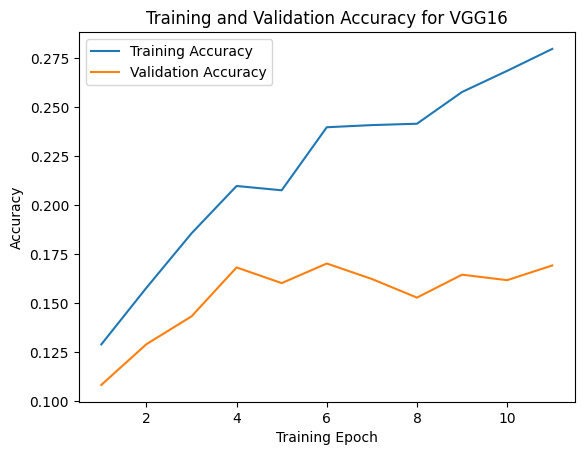

In [15]:
num_epochs = len(model_sum["acc"]) + 1

plt.plot(list(range(1, num_epochs)), model_sum["acc"], label='Training Accuracy')
plt.plot(list(range(1, num_epochs)), model_sum["val_acc"], label='Validation Accuracy')
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for VGG16")
plt.legend()
plt.show()

In [ ]:
# A simple CNN with two sets of convolutions, batch normalization, maxpooling, and dropout
model = Sequential()

# Convolution Layers extract features from images
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
# Batch Normalization prevents overfitting to training data
model.add(BatchNormalization())
model.add(Activation('relu'))
# Max Pooling is applied 
model.add(MaxPooling2D(pool_size=(2, 2)))
# Spatial Dropout prevents overfitting and is better for 
# image data than regular dropout
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer=Adam(), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])


In [ ]:
chk_path = 'CustomNet.h5'

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             moniter='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy',  
                          patience=5, 
                          verbose=1, 
                          restore_best_weights=True)

callbacks = [checkpoint, earlystop]

In [ ]:
model_sum = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)

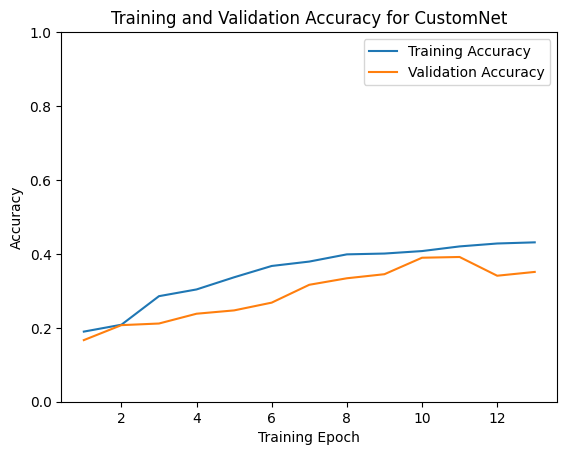

In [24]:
num_epochs = len(model_sum["acc"]) + 1

plt.plot(list(range(1, num_epochs)), model_sum["acc"], label='Training Accuracy')
plt.plot(list(range(1, num_epochs)), model_sum["val_acc"], label='Validation Accuracy')
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for CustomNet")
plt.ylim(0, 1)
plt.legend()
plt.show()

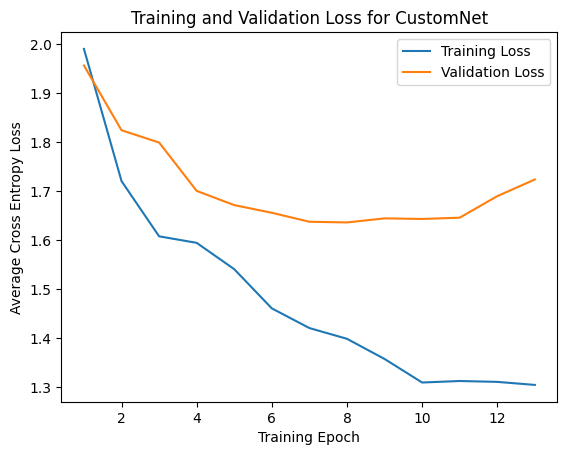

In [25]:
plt.plot(list(range(1, num_epochs)), model_sum["loss"], label='Training Loss')
plt.plot(list(range(1, num_epochs)), model_sum["val_loss"], label='Validation Loss')
plt.xlabel("Training Epoch")
plt.ylabel("Average Cross Entropy Loss")
plt.title("Training and Validation Loss for CustomNet")
plt.legend()
plt.show()

In [ ]:
# VGG16 Model is imported without any pre-training weights
model_1 = keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False)

model_2 = Sequential()

# A set of two convolutional layers, batch normalization, max pooling, 
# spatial dropout are added on top of the layers from VGG16
model_2.add(Conv2D(128, (5, 5), padding='same', input_shape=model_1.output_shape[1:]))
model_2.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(SpatialDropout2D(0.25))

# The data is flattened and then fully connected layers are applied
model_2.add(Flatten())

model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(6, activation='softmax'))

model = Model(inputs=model_1.input, outputs=model_2(model_1.output))
    
model.compile(optimizer=Adam(learning_rate=0.0001,
                  decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [ ]:
chk_path = 'CustomVGG16.h5'

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             moniter='val_accuracy')

earlystop = EarlyStopping(monitor='val_accuracy',  
                          patience=5, 
                          verbose=1, 
                          restore_best_weights=True)

callbacks = [checkpoint, earlystop]

In [ ]:
model_sum = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)

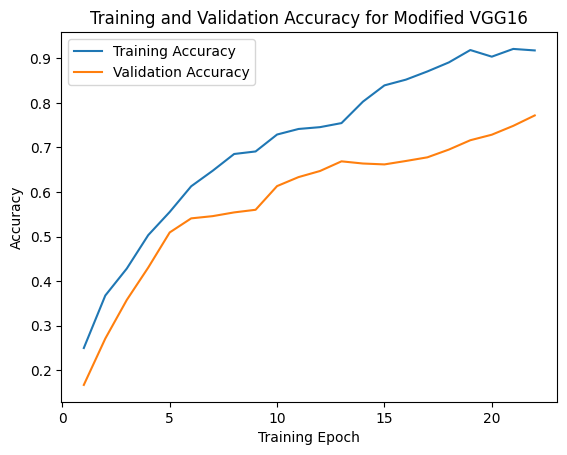

In [20]:
num_epochs = len(model_sum["acc"]) + 1

plt.plot(list(range(1, num_epochs)), model_sum["acc"], label='Training Accuracy')
plt.plot(list(range(1, num_epochs)), model_sum["val_acc"], label='Validation Accuracy')
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for Modified VGG16")
plt.legend()
plt.show()

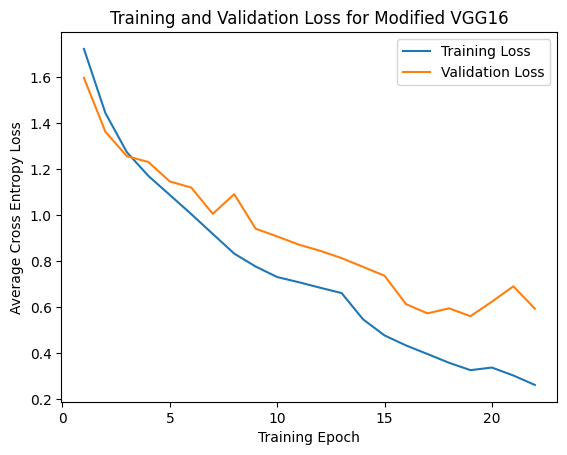

In [22]:
plt.plot(list(range(1, num_epochs)), model_sum["loss"], label='Training Loss')
plt.plot(list(range(1, num_epochs)), model_sum["val_loss"], label='Validation Loss')
plt.xlabel("Training Epoch")
plt.ylabel("Average Cross Entropy Loss")
plt.title("Training and Validation Loss for Modified VGG16")
plt.legend()
plt.show()